In [1]:
using CSV, DataFrames, Statistics
using PyPlot # plotting library
using PyCall
using Printf
using FStrings
using LaTeXStrings # for L"$x$" to work instead of needing to do "\$x\$"

# check out all of the styles! https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("seaborn-pastel")

# change settings for all plots at once, e.g. font size
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16

#make jupyter notebook print more dataframe columns
ENV["COLUMNS"]=160

# important attributes for this analysis
hand = "basic"
subjects = ["sub1", "sub2", "sub3"]
t_labels = ["a", "b", "c", "d", "e", "f", "g", "h"]
rotations = ["n"]
translations = ['a','b','c','d','e','f','g','h']

metrics = [:dist, :arc_len, :area_btwn, :max_a_loc, :max_a_reg, :max_err, :mvt_eff, :t_fd]

metric_to_color = Dict(:dist=>"xkcd:tan", :arc_len=>"xkcd:light blue", :area_btwn=>"xkcd:dark red", :max_a_loc=>"xkcd:light green", :max_a_reg=>"xkcd:dark green", :max_err=>"xkcd:blue grey", :mvt_eff=>"xkcd:dark orange", :r_fd=>"xkcd:red brown", :t_fd=>"xkcd:brown")


print("Ready to go!")

Ready to go!

-----

# Reading in the Data
Now reading in the metrics data for 2v2.

In [2]:
df_hand = CSV.read(f"results/{hand}_metrics.csv", DataFrame, copycols=true)
first(df_hand, 23)

,trial,arc_len,area_btwn,dist,max_a_loc,max_a_reg,max_err,mvt_eff,r_fd,t_fd
,String,Float64,Float64?,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,sub1_basic_a_n_1,0.0228927,6.57678e-5,0.00505051,0.0,0.0,0.011,0.220616,0.5143,0.0114702
2,sub1_basic_a_n_2,0.0295363,5.77915e-5,0.00505051,0.0,0.0,0.0049,0.170993,0.4406,0.0111463
3,sub1_basic_a_n_3,0.0306213,4.37218e-5,0.00505051,0.0,0.0,0.0037,0.164934,0.6955,0.0135204
4,sub1_basic_a_n_4,0.0137633,4.64978e-5,0.00505051,0.0,0.0,0.0,0.366954,0.2556,0.0132041
5,sub1_basic_a_n_5,0.006,missing,0.010101,0.0,0.0,0.0012,1.6835,0.0,0.00379473
6,sub2_basic_a_n_1,0.0079,2.06537e-5,0.00505051,0.0,0.0,0.0049,0.639304,0.7572,0.00994189
7,sub2_basic_a_n_2,0.0482012,7.97231e-5,0.00505051,0.0,0.0,0.0232,0.10478,1.2241,0.0234776
8,sub2_basic_a_n_3,0.0,0.0,0.00505051,0.0,0.0,0.0,Inf,0.0,0.00505051
9,sub2_basic_a_n_4,0.00306333,missing,0.010101,0.0,0.0,0.0,3.29739,0.0,0.00295466


In [3]:
# breaking out important info from the trial id for easier data access
subject_nums = []
translation_labels = []
numbers = []

for row in eachrow(df_hand)
    x = row[:trial]
    #sub1_basic_a_n_1
    push!(subject_nums, x[4])
    push!(translation_labels, x[12])
    push!(numbers, x[16])
end

s = convert(Array{Char,1}, subject_nums)
d = convert(Array{Char,1}, translation_labels)
n = convert(Array{Char,1}, numbers)

insertcols!(df_hand, 2, :subj=>s)
insertcols!(df_hand, 3, :dir=>d)
insertcols!(df_hand, 4, :num=>n)
first(df_hand, 2)

,trial,subj,dir,num,arc_len,area_btwn,dist,max_a_loc,max_a_reg,max_err,mvt_eff,r_fd,t_fd
,String,Char,Char,Char,Float64,Float64?,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,sub1_basic_a_n_1,1,a,1,0.0228927,6.57678e-5,0.00505051,0.0,0.0,0.011,0.220616,0.5143,0.0114702
2,sub1_basic_a_n_2,1,a,2,0.0295363,5.77915e-5,0.00505051,0.0,0.0,0.0049,0.170993,0.4406,0.0111463


## Asterisk Plot

![Avg Asterisk](./pics/avgd_basic_3subs_n.jpg)

-----

# Histograms of Metrics
Now I will produce histogram plots of the metrics to see what kind of a distribution we get for all the trials.
Shamelessly taken from my previous datascience course at: [link](https://github.com/SimonEnsemble/data_science_course)

In [4]:

for m in metrics
    figure()
    hist(df_hand[:, m], color=metric_to_color[m]) #, normed=true)
    scatter(df_hand[:, m], [-1 for i = 1:nrow(df_hand)], marker="+", color="r")
    xlabel(f"{m}")
    ylabel("# Trials")
    title(f"Distribution of {m} values")
end

LoadError: [91m(in a Julia function called from Python)[39m
[91mJULIA: MethodError: no method matching iterate(::Missing)[39m
[91mClosest candidates are:[39m
[91m  iterate(!Matched::Base.AsyncCollector, !Matched::Base.AsyncCollectorState) at asyncmap.jl:335[39m
[91m  iterate(!Matched::Base.AsyncCollector) at asyncmap.jl:306[39m
[91m  iterate(!Matched::BitSet) at bitset.jl:343[39m
[91m  ...[39m
[91mStacktrace:[39m
[91m [1] jlwrap_iterator(::Missing) at /home/john/.julia/packages/PyCall/tqyST/src/pyiterator.jl:144[39m
[91m [2] pyjlwrap_getiter(::Ptr{PyCall.PyObject_struct}) at /home/john/.julia/packages/PyCall/tqyST/src/pyiterator.jl:125[39m
[91m [3] macro expansion at /home/john/.julia/packages/PyCall/tqyST/src/exception.jl:95 [inlined][39m
[91m [4] #109 at /home/john/.julia/packages/PyCall/tqyST/src/pyfncall.jl:43 [inlined][39m
[91m [5] disable_sigint at ./c.jl:446 [inlined][39m
[91m [6] __pycall! at /home/john/.julia/packages/PyCall/tqyST/src/pyfncall.jl:42 [inlined][39m
[91m [7] _pycall!(::PyObject, ::PyObject, ::Tuple{Array{Union{Missing, Float64},1}}, ::Int64, ::PyObject) at /home/john/.julia/packages/PyCall/tqyST/src/pyfncall.jl:29[39m
[91m [8] _pycall!(::PyObject, ::PyObject, ::Tuple{Array{Union{Missing, Float64},1}}, ::Base.Iterators.Pairs{Symbol,String,Tuple{Symbol},NamedTuple{(:color,),Tuple{String}}}) at /home/john/.julia/packages/PyCall/tqyST/src/pyfncall.jl:11[39m
[91m [9] #pycall#115 at /home/john/.julia/packages/PyCall/tqyST/src/pyfncall.jl:83 [inlined][39m
[91m [10] hist(::Array{Union{Missing, Float64},1}; kws::Base.Iterators.Pairs{Symbol,String,Tuple{Symbol},NamedTuple{(:color,),Tuple{String}}}) at /home/john/.julia/packages/PyPlot/XHEG0/src/PyPlot.jl:177[39m
[91m [11] top-level scope at In[4]:4[39m
[91m [12] include_string(::Function, ::Module, ::String, ::String) at ./loading.jl:1091[39m
[91m [13] softscope_include_string(::Module, ::String, ::String) at /home/john/.julia/packages/SoftGlobalScope/u4UzH/src/SoftGlobalScope.jl:65[39m
[91m [14] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/john/.julia/packages/IJulia/e8kqU/src/execute_request.jl:67[39m
[91m [15] #invokelatest#1 at ./essentials.jl:710 [inlined][39m
[91m [16] invokelatest at ./essentials.jl:709 [inlined][39m
[91m [17] eventloop(::ZMQ.Socket) at /home/john/.julia/packages/IJulia/e8kqU/src/eventloop.jl:8[39m
[91m [18] (::IJulia.var"#15#18")() at ./task.jl:356[39m

### Observations of Histogram Plots
Based on what I see, here are the observations per metric (in order of appearance top to down):
* **total distance**: values are distributed
* **arc length**: mostly concentrated at low arc lengths
* **max area region location**: mostly, the region of max error area is most commonly found at the end
* **max area region**: at the locations of max error area, the area of error (aka the area between the path and the target line) is still relatively low
* **max error**: values are distributed
* **movement efficiency**: values are distributed
* **rotational frechet distance**: aka max rotation error. Mostly low, but larger distribution at the low end
* translational frechet distance: all values are very low

----

# Metric Values by direction
Plot all metric values in bar charts by direction

In [5]:
# groups = groupby(df_hand, :dir)
# a_df = groups[1]
# b_df = groups[2]
# c_df = groups[3]
# d_df = groups[4]
# e_df = groups[5]
# f_df = groups[6]
# g_df = groups[7]
# h_df = groups[8]
# directions = [a_df, b_df, c_df, d_df, e_df, f_df, g_df, h_df]
# a_df

In [6]:
function compare_metrics(metric::Symbol, df::DataFrame, ts="nothing") 
    if ts == "nothing"
        dir_data = groupby(df, :dir)
    els
        sub_df = filter(row -> row[:dir] in ts , df)
        dir_data = 
    end

    metric_data = []
    
    for dir in dir_data
        data = dir[!, metric]
        push!(metric_data, data)
    end
    plt_title = f"{hand}: {metric}"
    boxplot(metric_data)
    title(plt_title)
    xticks(1:8, t_labels)
    xlabel("Trial Directions")
end

println("Functions are ready!")

Functions are ready!


In [7]:
subjects = ["sub1", "sub2", "sub3"]
translations = ['a','b','c','d','e','f','g','h']
rotations = ["n"]

function get_trial_vals(df::DataFrame, metric::Symbol, translation::Char)
    desired_direction = filter(row -> row[:dir] == translation, df)
    names = desired_direction[!, :trial]
    values = desired_direction[!, metric]
    v = convert(Array{Float64,1}, values)
    
    return v, names
end

print("Functions are ready!")

Functions are ready!

-----

# Average Line Calculations

#### Dir: C
![Average Debug Plot for direction C](./pics/avgdebug_2v2_3subs_c_n.jpg)

#### Dir: G
![Average Debug Plot for direction G](./pics/avgdebug_2v2_3subs_g_n.jpg)


----

# T Tests for Symmetry

In [8]:
using HypothesisTests

In [22]:
function compare_2_directions(metric::Symbol, ts="nothing")
    if ts == "nothing"
        ts = ['a','b','c','d','e','f','g','h']
    end
        
    results_report = zeros(8, 8)
    
    for t in ts
        i = findall(x->x==t, ts)[1]
        n = 0
        
        for t2 in ts[i:end]
            v1, _ = get_trial_vals(df_hand, metric, t)
            v2, _ = get_trial_vals(df_hand, metric, t2)
            
            result = pvalue(UnequalVarianceTTest(v1, v2))
            r = round(result, digits=4)
            results_report[i, i+n] = r
            
            n = n+1
        end
        println(" ")
    end

    r_df = DataFrame(trials=translations = ["a", "b", "c", "d", "e", "f", "g", "h"], 
                     a=results_report[1,:], b=results_report[2,:], c=results_report[3,:],
                     d=results_report[4,:], e=results_report[5,:], f=results_report[6,:],
                     g=results_report[7,:], h=results_report[8,:])
    
    return r_df
end

# temp = compare_2_directions(:arc_len)
println("Functions are ready!")

Functions are ready!


In [10]:
# for m in metrics
#     maxes = []
#     mins = []
#     r = compare_2_directions(m)
    
#     println(f"{m} data")
#     println("   ")
#     println(r)
#     println("================================================")
#     println("    ")
# end

----

# Data Analysis 

![Avg Asterisk](./pics/avgd_basic_3subs_n.jpg)

**Hypotheses:**
* df

### Total Distance Travelled


In [23]:
compare_metrics(:dist, df_hand, ['c','g'])
compare_2_directions(:dist, ['c','g'])

LoadError: [91mMethodError: no method matching compare_metrics(::Symbol, ::DataFrame, ::Array{Char,1})[39m
[91m[0mClosest candidates are:[39m
[91m[0m  compare_metrics(::Symbol, ::DataFrame) at In[6]:1[39m

### Arc Length

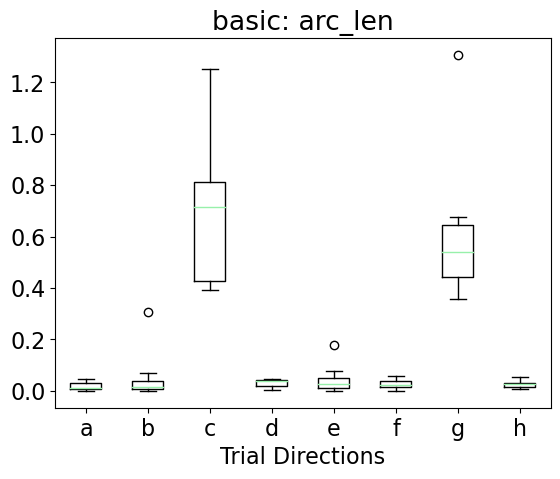

,trials,a,b,c,d,e,f,g,h
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b,0.2833,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,d,0.0249,0.5687,0.0,1.0,0.0,0.0,0.0,0.0
5,e,0.1002,0.8076,0.0,0.5312,1.0,0.0,0.0,0.0
6,f,0.2075,0.4491,0.0,0.4565,0.3229,1.0,0.0,0.0
7,g,0.0,0.0,0.2262,0.0,0.0,0.0,1.0,0.0
8,h,0.1298,0.4485,0.0,0.3971,0.3116,0.9836,0.0,1.0


In [12]:
compare_metrics(:arc_len, df_hand)
compare_2_directions(:arc_len)

### Movement Efficiency
total_distance / arc_length

In [13]:
compare_metrics(:mvt_eff, df_hand)
compare_2_directions(:mvt_eff)

LoadError: [91mArgumentError: TDist: the condition ν > zero(ν) is not satisfied.[39m

### Max Error

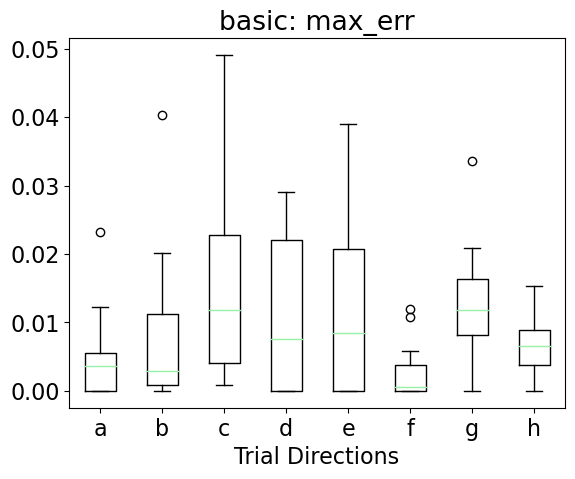

,trials,a,b,c,d,e,f,g,h
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b,0.4113,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c,0.0137,0.1496,1.0,0.0,0.0,0.0,0.0,0.0
4,d,0.1254,0.5735,0.3475,1.0,0.0,0.0,0.0,0.0
5,e,0.0802,0.4468,0.4686,0.831,1.0,0.0,0.0,0.0
6,f,0.3577,0.1792,0.0038,0.041,0.0242,1.0,0.0,0.0
7,g,0.0053,0.2413,0.5532,0.5865,0.7787,0.0004,1.0,0.0
8,h,0.402,0.7088,0.0328,0.2631,0.1753,0.0511,0.0183,1.0


In [14]:
compare_metrics(:max_err, df_hand)
compare_2_directions(:max_err)

### Translational Frechet Distance

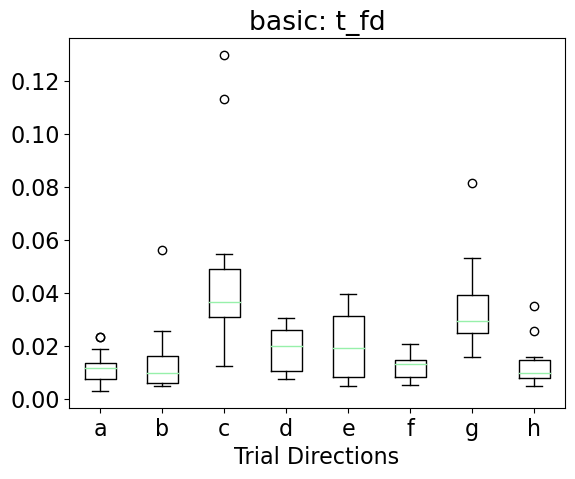

,trials,a,b,c,d,e,f,g,h
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b,0.5375,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c,0.0006,0.0017,1.0,0.0,0.0,0.0,0.0,0.0
4,d,0.0372,0.4518,0.0033,1.0,0.0,0.0,0.0,0.0
5,e,0.0477,0.3759,0.0047,0.7981,1.0,0.0,0.0,0.0
6,f,0.9925,0.532,0.0006,0.031,0.0428,1.0,0.0,0.0
7,g,0.0001,0.0026,0.1768,0.0031,0.0083,0.0001,1.0,0.0
8,h,0.7043,0.7376,0.0008,0.1417,0.1305,0.6952,0.0002,1.0


In [15]:
compare_metrics(:t_fd, df_hand)
compare_2_directions(:t_fd)

### Total Area Between Curves
Between object path and target line

In [16]:
compare_metrics(:area_btwn, df_hand)
compare_2_directions(:area_btwn)

LoadError: [91mPyError ($(Expr(:escape, :(ccall(#= /home/john/.julia/packages/PyCall/tqyST/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'TypeError'>[39m
[91mTypeError("unsupported operand type(s) for +: 'float' and 'PyCall.jlwrap'")[39m
[91m  File "/home/john/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py", line 2517, in boxplot[39m
[91m    return gca().boxplot([39m
[91m  File "/home/john/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py", line 1438, in inner[39m
[91m    return func(ax, *map(sanitize_sequence, args), **kwargs)[39m
[91m  File "/home/john/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py", line 3683, in boxplot[39m
[91m    bxpstats = cbook.boxplot_stats(x, whis=whis, bootstrap=bootstrap,[39m
[91m  File "/home/john/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 1177, in boxplot_stats[39m
[91m    stats['mean'] = np.mean(x)[39m
[91m  File "<__array_function__ internals>", line 5, in mean[39m
[91m  File "/home/john/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 3372, in mean[39m
[91m    return _methods._mean(a, axis=axis, dtype=dtype,[39m
[91m  File "/home/john/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py", line 160, in _mean[39m
[91m    ret = umr_sum(arr, axis, dtype, out, keepdims)[39m


### Max Area Region
The area between the curves of a scrolling window of about 20% total_distance width.

In [17]:
compare_metrics(:max_a_reg, df_hand)
compare_2_directions(:max_a_reg)

LoadError: [91mArgumentError: TDist: the condition ν > zero(ν) is not satisfied.[39m

### Max Area Location
The location of the center of the max area region, represented as a percentage along the full target line (that is, some percentage of 0.5).

In [18]:
compare_metrics(:max_a_loc, df_hand)
compare_2_directions(:max_a_loc)

LoadError: [91mArgumentError: TDist: the condition ν > zero(ν) is not satisfied.[39m

-----

# Clustering for Symmetry

In [19]:
using Clustering

# use kmeans or hierarchical clustering single linkage?

In [20]:
test = [1, 2, 3, 4, 5]
t = 2
i = findall(x->x!=t, test)

4-element Array{Int64,1}:
 1
 3
 4
 5